In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import faceted as faceted
import xarray as xr
import numpy as np
import scipy

sns.set_palette('hls', 4)
sns.set_style('ticks')

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 10,
    "text.latex.preamble": "\n".join([r'\usepackage{amsmath}'])
}) 

In [3]:
z = np.linspace(0,20e3, 2000)

#data from plot digitiztion of Figure 3 in Reisner et al. 2018
# 338.25431034482756, 11.977011494252872
# 397.5215517241379, 16.022988505747126

H = 12e3 #m
gamma_1 = (338.25 - 300)/H #K/m 
gamma_2 = (397.52 - 338.25)/4e3 #K/m 
theta_0 = 300 #K
g = 9.81 #m/s^2
R =  290.0 # Gas constant for dry air, J/kg/K
cp = 1000 # J/K/kg
ps = 1e5 #Pa surface

In [4]:
def theta(z):
    if z <= H:
        theta = theta_0 + gamma_1*z
    else:
        theta = theta_0 + gamma_1*H + gamma_2*(z-H)
    return theta

theta = np.vectorize(theta)

def p(z):
    f = 1/gamma_1*(np.log((theta_0 + gamma_1*z)/theta_0)) + np.heaviside(z-H, 1)*(
    (1/gamma_2)*np.log((theta_0 + gamma_1*H + gamma_2*(z - H))/(theta_0 + gamma_1*H)))

    return ps*(1-g/cp*f)**(cp/R)

def T(z):
    return theta(z)/(ps/p(z))**(R/cp)

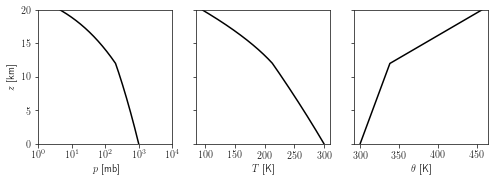

In [12]:
fig, axis = faceted.faceted(1,3, aspect=1.0, width=7.0, 
                            sharex=False, sharey=True,
                            left_pad=.5, bottom_pad=.5)

axis[0].plot(p(z)/100, z/1000, color='black')
axis[1].plot(T(z), z/1000, color='black')
axis[2].plot(theta(z), z/1000, color='black')

axis[0].set_xscale("log")
axis[0].set_xlabel("$p \\text{ [mb]}$")
axis[1].set_xlabel("$T \\text{ [K] }$")
axis[2].set_xlabel("$\\theta \\text{ [K]}$")
axis[0].set_ylabel("$z \\text{ [km]}$")

axis[0].set_xticks([1, 1e1, 1e2, 1e3, 1e4])
axis[1].set_xticks([100, 150, 200, 250, 300])
axis[2].set_xticks([300, 350, 400, 450])

axis[0].set_ylim([0,20])